<a href="https://colab.research.google.com/github/jeffreygalle/MAT422/blob/main/HW3_5and3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3.5 K-Means Clustering

K-means clustering partitions n observations into k clusters, where k is predefined. Each observation is assigned to the cluster with the nearest centroid, minimizing the within-cluster sum of squares (WCSS).



1.   Initialize: Randomly select k points as cluster centroids.
2.   Assign: Assign each observation to the nearest centroid based on Euclidean distance.
3. Update: Recalculate the centroids as the mean of all observations in each cluster.
4. Repeat: Iterate steps 2 and 3 until cluster assignments no longer change.

Mathematical formulation:

The goal is to minimize the following equation:

$\sum_{i=1}^k WCSS_i$

WCSS defintion: $WCSS_i = \sum_{x \in S_i} \| x - v_i \|^2$

where:


*   x represents an observation,
*   v_i represents the cluster centroid,
*   S_i represents the set of points in cluster i
*   At each iteration:
    *   Reassignment: Reduce the WCSS by assigning each point to tje nearest centroid.
    *   Recomputation: Updates centroids to minimize WCSS.


**Takeaways:**
K-means clustering converges quickly to a local optimum but does not guarantee a global optimum, as it is NP-hard. Also the algorithm is sensitive to the choice of initial centroids, so multiple runs with different initializations can improve the results.






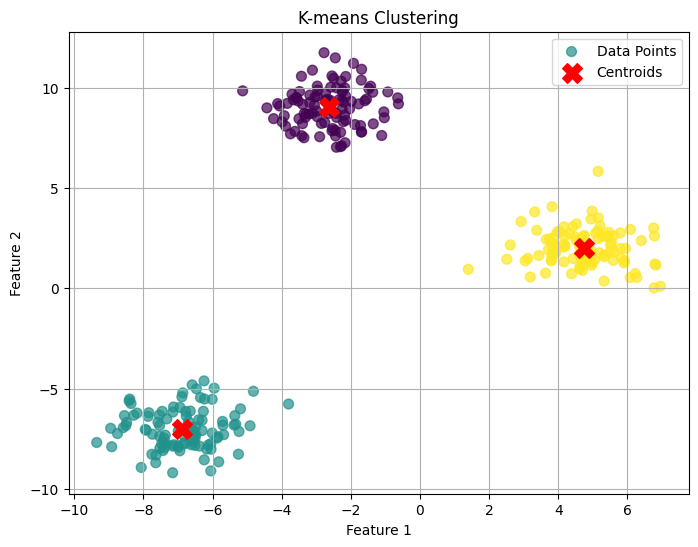

Cluster centers:
[[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]

Sum of Squared Distances: 566.8595511244134


In [3]:
# Python example for K-means clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


# Generate data to work on
n_samples = 300
n_features = 2
n_clusters = 3
random_state = 42

data, labels = make_blobs(
    n_samples=n_samples,
    n_features=n_features,
    centers=n_clusters,
    cluster_std=1.0,
    random_state=random_state
)

kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans.fit(data)
cluster_centers = kmeans.cluster_centers_
predicted_labels = kmeans.labels_

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=predicted_labels, cmap='viridis', s=50, alpha=0.7, label='Data Points')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.title("K-means clustering")
plt.xlabel("feature #1")
plt.ylabel("feature #2")
plt.legend()
plt.grid(True)
plt.show()


print("Cluster centers:")
print(cluster_centers)
print("\nSum of Squared Distances:", kmeans.inertia_)



# 3.6 Support Vector Machines

Support Vector Machines (SVMs) are supervised learning models used for classification and regression tasks. The SVMs find a hyperplane in a high-dimensional space to classify data points.

Goal: Maximize the margin (distance between the hyperplane and the nearest data points) from both classes.

Mathematical formulation:

A hyperplane can be defined as:
$w^T x - b = 0$

where:


*   w is the normal vector to the hyperplane,
*   b is the bias term,
*   x is a data point,
*   For two classes, the two parallel hyperplanes are:


$w^T x - b = 1$ and $w^T x - b = -1$

and all data points are to satisfy: $y_i (w^T x_i - b) >= 1$

where y_i represents the class label (+1 or -1) for the data point x_i.

Optimization: The goal is to minimize ||w||^2 subject to $y_i (w^T x_i - b) >= 1$  for all i.

The margin is equal to: $2 / ||w||$ . Note: Maximizing the margin is equal to minimizing ||w||.




*   For non-linearly separable data, SVMs map data into higher dimensions using kernel functions
*   Common kernel functions include polynomial kernels and the radial basis function (RBF).

**Takeaways:** SVMs are effective in high-dimensional spaces and well gaurded against overfitting, particularly in sparse datasets. Linear SVMs are efficient, non-linear SVMs with kernel methods can be use a lot of resources.


